In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [3]:
print('x_train[0]: ', x_train[0])
print('y_train[0]: ', y_train[0])

x_train[0]:  [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
y_train[0]:  [6]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

The label is: [6]


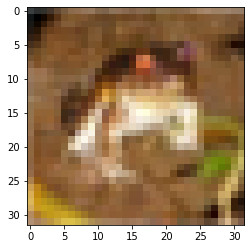

In [5]:
img = plt.imshow(x_train[0])
print('The label is:', y_train[0])

In [6]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [7]:
print('y_train shape:', y_train_one_hot.shape)
print('The one hot label is:', y_train_one_hot[1])

y_train shape: (50000, 10)
The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

Build and train

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [12]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(512, activation='relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [18]:
import tensorflow as tf
import keras

In [19]:
model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 107s 85ms/step - loss: 1.5834 - accuracy: 0.4195 - val_loss: 1.2374 - val_accuracy: 0.5570
Epoch 2/20
1250/1250 [==============================] - 110s 88ms/step - loss: 1.1611 - accuracy: 0.5851 - val_loss: 0.9732 - val_accuracy: 0.6545
Epoch 3/20
1250/1250 [==============================] - 112s 89ms/step - loss: 0.9946 - accuracy: 0.6472 - val_loss: 0.8830 - val_accuracy: 0.6877
Epoch 4/20
1250/1250 [==============================] - 113s 90ms/step - loss: 0.8980 - accuracy: 0.6826 - val_loss: 0.7966 - val_accuracy: 0.7223
Epoch 5/20
1250/1250 [==============================] - 112s 90ms/step - loss: 0.8215 - accuracy: 0.7115 - val_loss: 0.7767 - val_accuracy: 0.7305
Epoch 6/20
1250/1250 [==============================] - 109s 87ms/step - loss: 0.7577 - accuracy: 0.7331 - val_loss: 0.7389 - val_accuracy: 0.7414
Epoch 7/20
1250/1250 [==============================] - 112s 90ms/step - loss: 0.7102 - accuracy: 0.7490 - val_loss: 0

In [21]:
import matplotlib.pyplot as plt

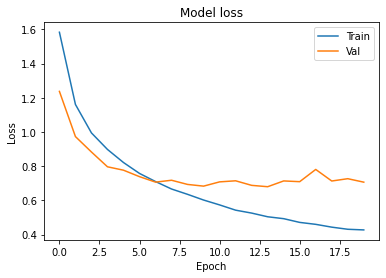

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

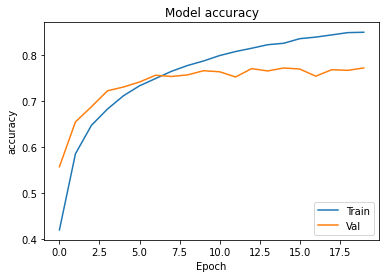

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 11s 34ms/step - loss: 0.7558 - accuracy: 0.7699


0.7699000239372253

In [25]:
model.save('cifar10_3layer_acc.h5')